## setup libraries

In [ ]:
# in case you're missing some 
# pip install jax plotly scikit-learn tqdm numpy pandas

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
# Define the color scale
color_scale = [
    [0, "darkblue"],
    [0.5, "white"],
    [1, "darkred"],
]

GENERATOR = np.random.default_rng(42)

## Data Nvidia and Microsoft stocks returns 

In [ ]:
df_msft = pd.read_csv("MSFT.csv", parse_dates=["Date"]).sort_values("Date").reset_index(drop=True)
df_msft.columns = ["MSFT_"+x for x in df_msft.columns]
df_nvda = pd.read_csv("NVDA.csv", parse_dates=["Date"]).sort_values("Date").reset_index(drop=True)
df_nvda.columns = ["NVDA_"+x for x in df_nvda.columns]
df = pd.concat([df_msft, df_nvda], axis=1)

In [ ]:
df

In [ ]:
df["MSFT_difference_shiftedclose_open"] = df["MSFT_Open"] - df["MSFT_Close"].shift(1)
df["NVDA_difference_shiftedclose_open"] = df["NVDA_Open"] - df["NVDA_Close"].shift(1)

df["MSFT_difference_shiftedclose_open"] = df["MSFT_difference_shiftedclose_open"].clip(-5, 5)
df["NVDA_difference_shiftedclose_open"] = df["NVDA_difference_shiftedclose_open"].clip(-5, 5)

df["win_or_loose"] = (df["MSFT_Open"] - df["MSFT_Close"]) + (df["NVDA_Open"] - df["NVDA_Close"])
df["target"] = np.logical_and(df["NVDA_difference_shiftedclose_open"] > 0, df["MSFT_difference_shiftedclose_open"] < 1).astype(int)

df = df.dropna()
df[["MSFT_difference_shiftedclose_open","NVDA_difference_shiftedclose_open", "win_or_loose", "target"]]

In [ ]:
# Plot the distribution of each input using Plotly Express
fig1 = px.histogram(df, x="MSFT_difference_shiftedclose_open", title="Distribution of MSFT", width=900).show()
fig2 = px.histogram(df, x="NVDA_difference_shiftedclose_open", title="Distribution of NVDA", width=900).show()
fig3 = px.bar(df["target"].value_counts(), title="Distribution of target", width=900).show()



px.scatter(
    df,
    x="MSFT_difference_shiftedclose_open",
    y="NVDA_difference_shiftedclose_open",
    color="target",
    hover_data="win_or_loose",
    title="solution space",
    color_continuous_scale=color_scale,
    width=900,
).show()

## Do we earn money :D 

In [ ]:
def plot_returns(strat):
    referentials = (df["win_or_loose"] * df["target"]/ 100)
    predicted_strats = (df["win_or_loose"] * strat/ 100)

    cum_ref_returns = 100 * (1 + referentials).cumprod()
    cum_pred_returns = 100 * (1 + predicted_strats).cumprod()
    result_df = pd.concat([cum_pred_returns, cum_ref_returns], axis=1)
    result_df.columns = ["predicted", "referential"]
    px.line(result_df, width=900).show()

def display_predictions(dataframe_to_display):
    
    px.scatter(
        dataframe_to_display,
        x="MSFT_difference_shiftedclose_open",
        y="NVDA_difference_shiftedclose_open",
        color="predictions",
        title="Régression Linear Classique",
        color_continuous_scale=color_scale,
        width=900,
    ).show()

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(dataframe_to_display["target"], dataframe_to_display["predictions"])

    # Create a DataFrame for the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

    px.imshow(
        conf_matrix_df,
        text_auto=True,
        aspect="auto",
        color_continuous_scale=color_scale,
        width=900,
        title="Confusion matrix",
    ).show()
    
    plot_returns(dataframe_to_display["predictions"])

    
plot_returns(df["target"])

## Creating our dataset

In [ ]:
X = df[["MSFT_difference_shiftedclose_open", "NVDA_difference_shiftedclose_open"]]
y = df[["target"]]

## Linear Regression, let's try to predict it 

In [ ]:
# Train a linear regression model

TODO

# transform prediction to binary
out = TODO

# Create a DataFrame for linear regression results
df_linear_regression = pd.DataFrame(X, columns=["MSFT_difference_shiftedclose_open", "NVDA_difference_shiftedclose_open"])
df_linear_regression["predictions"] = out
df_linear_regression["target"] = y

display_predictions(df_linear_regression)

## Perceptron

In [ ]:
# Define the perceptron function with activation
def perceptron_with_activation(inputs, weights):
    TODO


# Training function for the perceptron
def train_perceptron(inputs, labels, learning_rate, epochs, activation):
    TODO


# Train the perceptron
learning_rate = 0.1
epochs = 100

trained_weights = train_perceptron(X.to_numpy(), y.to_numpy(), learning_rate, epochs)

# Calculate outputs with trained weights
out = perceptron_with_activation(X, trained_weights, activation)
# transform for binary
out = TODO

# Create a DataFrame for linear regression results
df_perceptron = pd.DataFrame(X, columns=["MSFT_difference_shiftedclose_open", "NVDA_difference_shiftedclose_open"])
df_perceptron["predictions"] = out
df_perceptron["target"] = y

display_predictions(df_perceptron)

## Multi Layer - Feed Forward Network(FFN) - Artificial Neural Network(ANN)

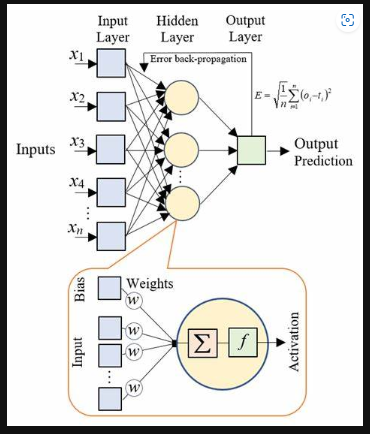

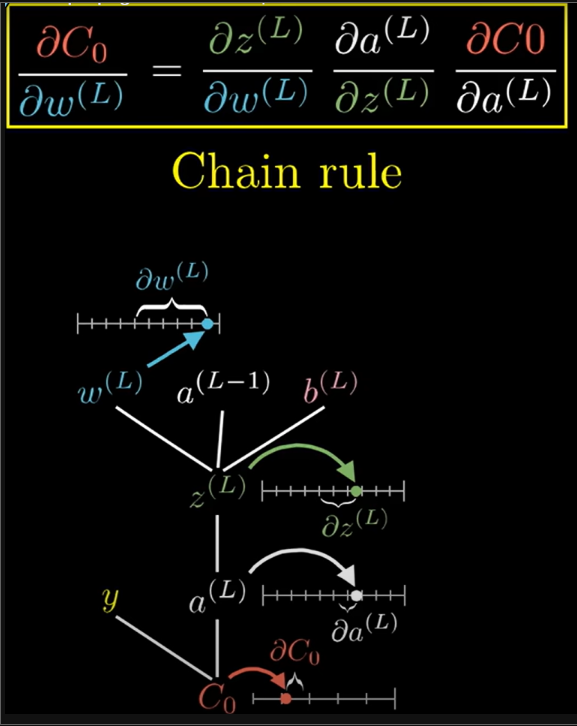

In [ ]:
import jax.numpy as np

# function relu and sigmoid
# example relu(w1 @ X1) gives you the output of a neurone that have input X1, weights w1 and activation function relu
relu = jax.nn.relu
sigmoid = jax.nn.sigmoid


# Définir la fonction de perte (erreur quadratique moyenne)
def loss(weights, inputs, targets):
    TODO

# Définir la passe avant pour un perceptron multicouche
def forward_mlp(inputs, weights):
    TODO


# Initialize weights
def initialize_weights(layer_sizes):
    weights = []
    for i in range(len(layer_sizes) - 1):
        weight = GENERATOR.uniform(size=(layer_sizes[i], layer_sizes[i + 1]))
        weights.append(weight)
    return weights


# Initialiser les poids du réseau
layer_sizes = [2, 4, 1]
weights = initialize_weights(layer_sizes)
learning_rate = 0.1


# Calculer le gradient de la fonction de perte
loss_grad = jax.value_and_grad(loss, argnums=(0))

history = []

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

for epoch in tqdm(range(1000)):

    # Compute the gradients for the minibatch
    value, grad = loss_grad(weights, X_standardized, y.to_numpy())

    # Update weights
    weights = TODO

    # Record the loss for the epoch
    epoch_loss = TODO
    history.append(epoch_loss)
    

px.line([history[x] for x in range(len(history)) if x%10==0], width=900, markers=True).show()

out = forward_mlp(X_standardized, weights)

# transform for binary
out = TODO

# Create a DataFrame for linear regression results
df_multi_perceptron = pd.DataFrame(X, columns=["MSFT_difference_shiftedclose_open", "NVDA_difference_shiftedclose_open"])
df_multi_perceptron["predictions"] = out
df_multi_perceptron["target"] = y

display_predictions(df_multi_perceptron)

## With Python libs : KERAS

In [ ]:
# Set JAX as the backend for Keras
import os

os.environ["KERAS_BACKEND"] = "jax"
import jax
import keras

# Define the input layer
inputs = TODO

# Define the hidden layers
x = TODO

# Define the output layer
outputs = TODO

# Create the model
model = TODO

# Compile the model
model.compile(
    optimizer=TODO,
    loss=TODO,
)

# Summary of the model
model.summary()


# Train the model
history = model.fit(X_standardized, y, epochs=2000, verbose=0)

px.line(history.history["loss"], width=900, markers=True).show()

out = model.predict(X_standardized)

# transform for binary
out = TODO

# Create a DataFrame for linear regression results
df_keras = pd.DataFrame(X, columns=["MSFT_difference_shiftedclose_open", "NVDA_difference_shiftedclose_open"])
df_keras["predictions"] = out
df_keras["target"] = y

display_predictions(df_keras)